In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
train_datatot = pd.read_csv('/Users/everette/Desktop/STATS 607/Project/Unit 1/607 Unit 1 project/spam-data/spam-train.txt', header=None, sep=',')
train_datatot.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.000,0.610,0.000,0.203,0.000,0.0,2.541,15,61,0
1,0.00,0.0,0.59,0.11,0.00,0.00,0.0,0.00,0.11,0.23,...,0.227,0.322,0.113,0.056,0.075,0.0,2.546,38,601,0
2,0.06,0.0,0.40,0.00,0.13,0.13,0.0,0.13,0.00,0.00,...,0.028,0.085,0.000,0.000,0.000,0.0,2.341,22,665,0
3,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.0,1.500,4,24,0
4,0.00,0.0,0.00,0.00,0.00,0.44,0.0,0.00,0.00,0.00,...,0.000,0.150,0.000,0.000,0.000,0.0,1.613,11,71,0


In [4]:
test_datatot = pd.read_csv('/Users/everette/Desktop/STATS 607/Project/Unit 1/607 Unit 1 project/spam-data/spam-test.txt', header=None, sep=',')
test_datatot.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.12,0.12,0.24,0.0,1.34,0.12,0.00,0.12,0.00,0.00,...,0.061,0.020,0.0,0.041,0.041,0.000,2.351,69,254,1
1,0.00,0.00,0.32,0.0,0.64,0.64,0.64,0.32,0.32,0.00,...,0.000,0.156,0.0,0.000,0.156,0.000,1.752,19,149,1
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.000,1.666,6,30,0
3,0.00,0.00,0.40,0.0,0.40,0.20,0.00,0.00,0.00,1.01,...,0.000,0.030,0.0,0.000,0.302,0.000,1.727,11,190,1
4,0.51,0.43,0.29,0.0,0.14,0.03,0.00,0.18,0.54,0.62,...,0.012,0.078,0.0,0.443,0.510,0.133,6.590,739,2333,1


In [5]:
train_data = train_datatot.iloc[:, :-1]
train_labels = train_datatot.iloc[:, -1]
test_data = test_datatot.iloc[:, :-1]
test_labels = test_datatot.iloc[:, -1]

In [6]:
# Standardize the data
scaler = StandardScaler()
train_data_standardized = scaler.fit_transform(train_data)
test_data_standardized = scaler.transform(test_data)

**(a)** Fit a penalized logistic regression model, which seeks to minimize
		$$
		-\log \text{ conditional likelihood } + \lambda \theta^T \theta
		$$
		The parameter $\lambda$ can be chosen by cross-validation. Report the mean error rate on both the training and test sets.

In [8]:
from sklearn.linear_model import LogisticRegressionCV

# Logistic Regression on standardized data
Cs=10**np.linspace(-4., 4., 100)
model_1 = LogisticRegressionCV(Cs=Cs,
                                 cv=5, #cross-validation
                                 penalty='l2', #ridge
                                 solver='lbfgs',
                                 max_iter=1000)

model_1.fit(train_data_standardized, train_labels)

train_1_pred = model_1.predict(train_data_standardized)
test_1_pred = model_1.predict(test_data_standardized)

# Mean Error Rate
train_1_err = np.mean(train_1_pred != train_labels)
test_1_err = np.mean(test_1_pred != test_labels)
train_1_err, test_1_err

(np.float64(0.07010107597000326), np.float64(0.07235984354628422))

In [9]:
results = pd.DataFrame({
    'Data Preprocessing': ['Standardized', 'Standardized'],
    'Dataset': ['Train', 'Test'],
    'Mean Error Rate': [train_1_err, test_1_err]
})

print(results)

  Data Preprocessing Dataset  Mean Error Rate
0       Standardized   Train         0.070101
1       Standardized    Test         0.072360


**(b)** Write your LDA code to fit the standardized data and the log transformed data. Report your error rates.

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA on standardized data
lda_1 = LinearDiscriminantAnalysis()
lda_1.fit(train_data_standardized, train_labels)

train_1_pred_lda = lda_1.predict(train_data_standardized)
test_1_pred_lda = lda_1.predict(test_data_standardized)

# Mean Error Rate
train_1_err_lda = np.mean(train_1_pred_lda != train_labels)
test_1_err_lda = np.mean(test_1_pred_lda != test_labels)
train_1_err_lda, test_1_err_lda

(np.float64(0.10172807303553962), np.float64(0.09582790091264667))

In [11]:
lda_results = pd.DataFrame({
    'Data Preprocessing': ['Standardized'],
    'Train Error Rate': [train_1_err_lda],
    'Test Error Rate': [test_1_err_lda]
})

print(lda_results)

  Data Preprocessing  Train Error Rate  Test Error Rate
0       Standardized          0.101728         0.095828


**(d)** Perform Kernel logistic regression to fit the standardized data and the log transformed data (You may use a existing package or write your own code). Please consider Gaussian and polynomial kernels to produce the corresponding classifiers. Try a range of tuning parameters and show how such choices affect the behavior of the classifier obtained and the misclassification error on the test set.

In [12]:
# Kernel Logistic Regression
# Code by: Moritz Korte-Stapff and Simon Fontaine
import numpy as np
from scipy.special import expit
from scipy import optimize

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.optimize import _check_optimize_result
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.preprocessing import LabelBinarizer


def _loss_and_grad(w, K, y, alpha, clip=30):
    """
    Computes the loss and the gradient
    The loss is the negative likelihood function
    :param w:
        array-like of shape (n_samples,)
        weights
    :param K:
        array-like of shape (n_sample, n_samples)
        the kernel matrix
    :param y:
        array-like of shape (n_samples,)
        labels
    :param alpha:
        float
        penalty parameter
    :return:
        out : float
            The loss
        grad : ndarray of shape (X.shape[0],)
            The gradient
    """
    n_samples = K.shape[0]

    linear_prediction = K.dot(w)
    penalty = (alpha / 2.) * w.T.dot(K).dot(w)

    # Loss for kernel logistic regression is the negative likelihood
    out = np.sum(-y * linear_prediction + np.log(1 + np.exp(linear_prediction))) + penalty

    z = expit(linear_prediction)
    z0 = y - z - alpha * w

    grad = -K.dot(z0)

    return out, grad


def _kernel_logistic_regression_path(K, y, max_iter, tol=1e-4, coef=None,
                                     solver='lbfgs', check_input=True,
                                     C = 1):
    """
    Compute the kernel logistic regression model
    :param K:
        array-like of shape (n_sample, n_features)
        Input pitchfx
    :param y:
        array-like of shape (n_samples,)
        Input pitchfx, target values
    :param tol:
        float, default = 1e-4
        The stopping criterion for the solver
    :param coef:
        array-like of shape (n_samples,)
        Initialisation values of coefficients for the regression
    :param solver:
        str
        The solver to be used
    :param check_input:
        bool, default = True
        Determines whether the input pitchfx should be checked
    :return:
        w0 : ndarray of shape
    """

    # TODO: implement
    # if check_input:

    n_samples, n_features = K.shape
    classes = np.unique(y)

    if not classes.size == 2:
        raise ValueError("Only binary Classification.")

    func = _loss_and_grad

    if coef is None:
        w0 = np.zeros(n_samples, order='F', dtype=K.dtype)
    else:
        w0 = coef

    # TODO: implement other solvers
    if solver == 'lbfgs':
        opt_res = optimize.minimize(
            func, w0, method="L-BFGS-B", jac=True,
            args=(K, y, 1. / C, 30),
            options={"gtol": tol, "maxiter": max_iter} # The "iprint" option has been removed.
        )

    n_iter = _check_optimize_result(solver, opt_res, max_iter)

    w0, loss = opt_res.x, opt_res.fun

    return np.array(w0), n_iter


class KernelLogisticRegression(BaseEstimator, ClassifierMixin):
    """ Binary Classifier using Kernel Logistic Regression
    ----------
    kernel : str, default='rbf_kernel'
        Used to determine which kernel function is to be used when generating
        the kernel matrix
    learning_rate : float, default=1
        The learning rate for gradient descent
    gamma : float, default = 1
        Used during the creation for the Gaussian kernel matrix
    C : float, default = 1
        The inverse of the penalty parameter
    """

    def __init__(self,
                 kernel='rbf',
                 learning_rate=1,
                 gamma=1,
                 degree=3,
                 coef0=1,
                 C=1,
                 tol=1e-4,
                 kernel_params=None,
                 max_iter=1000):
        self.kernel = kernel
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.degree = degree
        self.coef0 = coef0
        self.C = C
        self.tol = tol
        self.kernel_params = kernel_params
        self.max_iter = max_iter

    def _get_kernel(self, X, Y=None):
        if callable(self.kernel):
            params = self.kernel_params or {}
        else:
            params = {"gamma": self.gamma,
                      "degree": self.degree,
                      "coef0": self.coef0}
        return pairwise_kernels(X, Y, metric=self.kernel,
                                filter_params=True, **params)

    def fit(self, X, y):
        """A reference implementation of a fitting function.
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape (n_samples, n_features)
            The training input samples.
        y : array-like, shape (n_samples,) or (n_samples, n_outputs)
            The target values (class labels in classification, real numbers in
            regression).
        Returns
        -------
        self : object
            Returns self.
        """
        if self.C < 0:
            raise ValueError("Penalty must be positive")

        # Necessary for prediction
        self.X_ = X

        X, y = check_X_y(X, y, accept_sparse=True)
        self.label_encoder_ = LabelBinarizer(neg_label=0, pos_label=1)
        y_ = self.label_encoder_.fit_transform(y).reshape((-1))

        self.classes_ = self.label_encoder_.classes_
        K = self._get_kernel(X)

        self.coef_, self.n_iter_ = _kernel_logistic_regression_path(K, y_, tol=self.tol, coef=None,
                                     C=self.C, solver='lbfgs', check_input=True,
                                     max_iter=self.max_iter)

        self.is_fitted_ = True

        return self

    def decision_function(self, X):

        check_is_fitted(self, ["X_", "coef_"])

        K = self._get_kernel(X, self.X_)

        scores = K.dot(self.coef_)

        return scores

    def predict(self, X):
        """ A reference implementation of a predicting function.
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape (n_samples, n_features)
            The training input samples.
        Returns
        -------
        y : ndarray, shape (n_samples,)
            Returns an array of ones.
        """
        scores = self.decision_function(X)

        indices = (scores > 0).astype(int)

        return self.classes_[indices]

    def predict_proba(self, X):
        """
        Probability estimates.
        The returned estimates for all classes are ordered by the
        label of classes.
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Vector to be scored, where `n_samples` is the number of samples and
            `n_features` is the number of features.
        Returns
        -------
        T : array-like of shape (n_samples, n_classes)
            Returns the probability of the sample for each class in the model,
            where classes are ordered as they are in ``self.classes_``.
        """

        check_is_fitted(self)

        pred_1 = expit(self.decision_function(X).clip(-30, 30)).reshape((-1, 1))

        return np.hstack((1.0 - pred_1, pred_1))

    def predict_log_proba(self, X):
        """
        Predict logarithm of probability estimates.
        The returned estimates for all classes are ordered by the
        label of classes.
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Vector to be scored, where `n_samples` is the number of samples and
            `n_features` is the number of features.
        Returns
        -------
        T : array-like of shape (n_samples, n_classes)
            Returns the log-probability of the sample for each class in the
            model, where classes are ordered as they are in ``self.classes_``.
        """

        check_is_fitted(self)

        return np.log(self.predict_proba(X))

In [13]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.metrics import accuracy_score
import numpy as np

gammas = np.linspace(0.1, 0.3, 5)
Cs = np.linspace(25, 100, 10)

# RBF Kernel on Standardized Data
results_std_rbf = []

for gamma in gammas:
    for C in Cs:
        model_rbf = KernelLogisticRegression(kernel='rbf', gamma=gamma, C=C, max_iter=1000)
        model_rbf.fit(train_data_standardized, train_labels)
        pred_test_std_rbf = model_rbf.predict(test_data_standardized)
        test_err_std_rbf = 1 - accuracy_score(test_labels, pred_test_std_rbf)
        results_std_rbf.append({'kernel':'rbf', 'gamma':gamma, 'C':C, 'test_error':test_err_std_rbf})
        print(f"RBF kernel, gamma={gamma}, C={C}, Test Error={test_err_std_rbf:.4f}")

RBF kernel, gamma=0.1, C=25.0, Test Error=0.0430
RBF kernel, gamma=0.1, C=33.333333333333336, Test Error=0.0424
RBF kernel, gamma=0.1, C=41.66666666666667, Test Error=0.0417
RBF kernel, gamma=0.1, C=50.0, Test Error=0.0417
RBF kernel, gamma=0.1, C=58.333333333333336, Test Error=0.0417
RBF kernel, gamma=0.1, C=66.66666666666667, Test Error=0.0430
RBF kernel, gamma=0.1, C=75.0, Test Error=0.0424
RBF kernel, gamma=0.1, C=83.33333333333334, Test Error=0.0437
RBF kernel, gamma=0.1, C=91.66666666666667, Test Error=0.0430
RBF kernel, gamma=0.1, C=100.0, Test Error=0.0430
RBF kernel, gamma=0.15, C=25.0, Test Error=0.0417
RBF kernel, gamma=0.15, C=33.333333333333336, Test Error=0.0430
RBF kernel, gamma=0.15, C=41.66666666666667, Test Error=0.0424
RBF kernel, gamma=0.15, C=50.0, Test Error=0.0430
RBF kernel, gamma=0.15, C=58.333333333333336, Test Error=0.0424
RBF kernel, gamma=0.15, C=66.66666666666667, Test Error=0.0424
RBF kernel, gamma=0.15, C=75.0, Test Error=0.0424
RBF kernel, gamma=0.15, C

In [14]:
best_result_std_rbf = min(results_std_rbf, key=lambda x: x['test_error'])
print(f"Best gamma={best_result_std_rbf['gamma']}, C={best_result_std_rbf['C']}, Test Error={best_result_std_rbf['test_error']:.3f}")

Best gamma=0.2, C=75.0, Test Error=0.038


In [15]:
# Polynomial Kernel on Standardized Data

results_std_poly = []

for degree in [2, 3, 4]:
    for C in [0.01, 1, 100]:
        model_std_poly = KernelLogisticRegression(
            kernel='poly', 
            coef0=100,  
            gamma=1e-10,    
            max_iter=1000  
        )
        model_std_poly.fit(train_data_standardized, train_labels)
        pred_test_std_poly = model_std_poly.predict(test_data_standardized)
        test_err_std_poly = 1 - accuracy_score(test_labels, pred_test_std_poly)
        results_std_poly.append({'kernel':'poly', 'degree':degree, 'coef0':1, 'C':C, 'test_error':test_err_std_poly})
        print(f"Polynomial kernel, degree={degree}, coef0=1, C={C}, Test Error={test_err_std_poly:.3f}")

Polynomial kernel, degree=2, coef0=1, C=0.01, Test Error=0.403
Polynomial kernel, degree=2, coef0=1, C=1, Test Error=0.403
Polynomial kernel, degree=2, coef0=1, C=100, Test Error=0.403
Polynomial kernel, degree=3, coef0=1, C=0.01, Test Error=0.403
Polynomial kernel, degree=3, coef0=1, C=1, Test Error=0.403
Polynomial kernel, degree=3, coef0=1, C=100, Test Error=0.403
Polynomial kernel, degree=4, coef0=1, C=0.01, Test Error=0.403
Polynomial kernel, degree=4, coef0=1, C=1, Test Error=0.403
Polynomial kernel, degree=4, coef0=1, C=100, Test Error=0.403


In [17]:
best_result_std_poly = min(results_std_poly, key=lambda x: x['test_error'])
print(f"Best degree={best_result_std_poly['degree']}, coef0={best_result_std_poly['coef0']}, C={best_result_std_poly['C']}, Test Error={best_result_std_poly['test_error']:.3f}")

Best degree=2, coef0=1, C=0.01, Test Error=0.403


(a) Fit CART, Bagging, Random Forest, AdaBoost, and Gradient Boosting. Report their classification results.

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
from sklearn.metrics import classification_report, accuracy_score

In [19]:
models = {
    'CART': DecisionTreeClassifier(random_state=0),
    'Bagging': BaggingClassifier(
        estimator=DecisionTreeClassifier(), 
        n_estimators=100, random_state=0
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100, random_state=0
    ),
    'AdaBoost': AdaBoostClassifier(
        n_estimators=100, random_state=0
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100, random_state=0
    )
}

In [21]:
for name, clf in models.items():
    clf.fit(train_data_standardized, train_labels)
    y_pred = clf.predict(test_data_standardized)
    acc = accuracy_score(test_labels, y_pred)
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(test_labels, y_pred, digits=4))


=== CART ===
Accuracy: 0.9505
              precision    recall  f1-score   support

           0     0.9719    0.9443    0.9579       916
           1     0.9208    0.9595    0.9398       618

    accuracy                         0.9505      1534
   macro avg     0.9464    0.9519    0.9488      1534
weighted avg     0.9513    0.9505    0.9506      1534


=== Bagging ===
Accuracy: 0.9654
              precision    recall  f1-score   support

           0     0.9757    0.9662    0.9709       916
           1     0.9506    0.9644    0.9574       618

    accuracy                         0.9654      1534
   macro avg     0.9632    0.9653    0.9642      1534
weighted avg     0.9656    0.9654    0.9655      1534


=== Random Forest ===
Accuracy: 0.9772
              precision    recall  f1-score   support

           0     0.9846    0.9771    0.9808       916
           1     0.9664    0.9773    0.9718       618

    accuracy                         0.9772      1534
   macro avg     0.9755

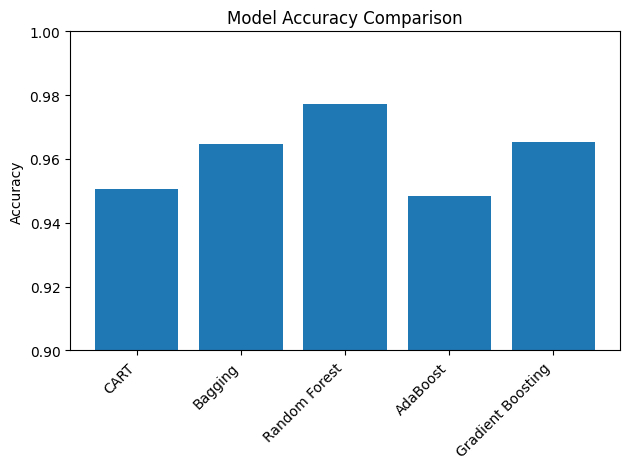

In [22]:
import matplotlib.pyplot as plt

models = ['CART', 'Bagging', 'Random Forest', 'AdaBoost', 'Gradient Boosting']
accuracies = [0.9505, 0.9648, 0.9772, 0.9485, 0.9654]

plt.figure()
plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.ylim(0.90, 1.00)
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

(2) Fit a neural network.

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


y_train = train_datatot.iloc[:, -1].values.astype(np.int64)
y_test  = test_datatot.iloc[:, -1].values.astype(np.int64)



batch_size = 64
train_ds = TensorDataset(
    torch.from_numpy(train_data_standardized).float(),
    torch.from_numpy(y_train)
)
test_ds = TensorDataset(
    torch.from_numpy(test_data_standardized).float(),
    torch.from_numpy(y_test)
)
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=batch_size)

class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    def forward(self, x):
        return self.net(x)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLP(input_dim=train_data_standardized.shape[1], hidden_dim=100, output_dim=2).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

n_epochs = 30
model.train()
for epoch in range(n_epochs):
    total_loss = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {total_loss/len(train_ds):.4f}")

model.eval()
all_preds = []
with torch.no_grad():
    for xb, _ in test_loader:
        xb = xb.to(device)
        logits = model(xb)
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        all_preds.append(preds)

y_pred = np.concatenate(all_preds)
acc = accuracy_score(y_test, y_pred)

print("\n=== Neural Network (PyTorch MLP) ===")
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred, digits=4))

Epoch 1/30, Loss: 0.4614
Epoch 2/30, Loss: 0.2620
Epoch 3/30, Loss: 0.2137
Epoch 4/30, Loss: 0.1888
Epoch 5/30, Loss: 0.1727
Epoch 6/30, Loss: 0.1609
Epoch 7/30, Loss: 0.1525
Epoch 8/30, Loss: 0.1441
Epoch 9/30, Loss: 0.1384
Epoch 10/30, Loss: 0.1311
Epoch 11/30, Loss: 0.1258
Epoch 12/30, Loss: 0.1211
Epoch 13/30, Loss: 0.1161
Epoch 14/30, Loss: 0.1125
Epoch 15/30, Loss: 0.1086
Epoch 16/30, Loss: 0.1049
Epoch 17/30, Loss: 0.1006
Epoch 18/30, Loss: 0.0972
Epoch 19/30, Loss: 0.0938
Epoch 20/30, Loss: 0.0910
Epoch 21/30, Loss: 0.0881
Epoch 22/30, Loss: 0.0860
Epoch 23/30, Loss: 0.0824
Epoch 24/30, Loss: 0.0803
Epoch 25/30, Loss: 0.0809
Epoch 26/30, Loss: 0.0763
Epoch 27/30, Loss: 0.0740
Epoch 28/30, Loss: 0.0731
Epoch 29/30, Loss: 0.0708
Epoch 30/30, Loss: 0.0688

=== Neural Network (PyTorch MLP) ===
Accuracy: 0.9615
              precision    recall  f1-score   support

           0     0.9653    0.9705    0.9679       916
           1     0.9560    0.9482    0.9521       618

    accura

(3) Fit SVM and Kernel SVM (with Gaussian and polynomial kernels) and report the classification results. (Try a range of tuning parameters and show how such choices affect the classification results).

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# 3.1 linear kernel SVM
param_grid_lin = {'C': [60, 65, 70, 75, 80]}
grid_lin = GridSearchCV(
    SVC(kernel='linear'), 
    param_grid_lin, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1
)
grid_lin.fit(train_data_standardized, y_train)
print("=== Linear SVM ===")
print("Best params:", grid_lin.best_params_)
y_pred = grid_lin.predict(test_data_standardized)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))


=== Linear SVM ===
Best params: {'C': 70}
Test accuracy: 0.9328552803129074
              precision    recall  f1-score   support

           0     0.9320    0.9574    0.9445       916
           1     0.9342    0.8964    0.9149       618

    accuracy                         0.9329      1534
   macro avg     0.9331    0.9269    0.9297      1534
weighted avg     0.9329    0.9329    0.9326      1534



In [26]:
# 3.2 RBF kernel SVM
param_grid_rbf = {
    'C':     [10, 30, 50, 70, 100, 150, 200],
    'gamma': [0.001, 0.01, 0.1, 1]
}
grid_rbf = GridSearchCV(
    SVC(kernel='rbf'),
    param_grid_rbf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_rbf.fit(train_data_standardized, y_train)
print("=== RBF Kernel SVM ===")
print("Best params:", grid_rbf.best_params_)
y_pred = grid_rbf.predict(test_data_standardized)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))


=== RBF Kernel SVM ===
Best params: {'C': 70, 'gamma': 0.01}
Test accuracy: 0.9524119947848761
              precision    recall  f1-score   support

           0     0.9460    0.9760    0.9608       916
           1     0.9626    0.9175    0.9395       618

    accuracy                         0.9524      1534
   macro avg     0.9543    0.9467    0.9501      1534
weighted avg     0.9527    0.9524    0.9522      1534



In [27]:
# 3.3 Poly kernel SVM
param_grid_poly = {
    'C':      [30, 40, 45, 50, 55, 60, 70],
    'degree': [2, 3, 4, 5, 6],
    'gamma':  ['scale'],  
    'coef0':  [0.0, 1.0]  
}
grid_poly = GridSearchCV(
    SVC(kernel='poly'),
    param_grid_poly,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_poly.fit(train_data_standardized, y_train)
print("=== Polynomial Kernel SVM ===")
print("Best params:", grid_poly.best_params_)
y_pred = grid_poly.predict(test_data_standardized)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

=== Polynomial Kernel SVM ===
Best params: {'C': 50, 'coef0': 1.0, 'degree': 2, 'gamma': 'scale'}
Test accuracy: 0.9504563233376793
              precision    recall  f1-score   support

           0     0.9497    0.9683    0.9589       916
           1     0.9517    0.9239    0.9376       618

    accuracy                         0.9505      1534
   macro avg     0.9507    0.9461    0.9483      1534
weighted avg     0.9505    0.9505    0.9503      1534



(4) compare with all other methods.